In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
import pickle
import joblib

In [21]:
# Load the dataset

insurance_data = pd.read_csv(r'C:\Users\ENVY\OneDrive\Documents\medical_cost_insurance.csv')

# Display the first few rows of the DataFrame
print(insurance_data.head())



   age     sex     bmi  children smoker     region      charges  Unnamed: 7
0   19  female  27.900         0    yes  southwest  16884.92400         NaN
1   18    male  33.770         1     no  southeast   1725.55230         NaN
2   28    male  33.000         3     no  southeast   4449.46200         NaN
3   33    male  22.705         0     no  northwest  21984.47061         NaN
4   32    male  28.880         0     no  northwest   3866.85520         NaN


In [22]:
# EDA: Explore the dataset
print(insurance_data.info())
print(insurance_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   sex         1338 non-null   object 
 2   bmi         1338 non-null   float64
 3   children    1338 non-null   int64  
 4   smoker      1338 non-null   object 
 5   region      1338 non-null   object 
 6   charges     1338 non-null   float64
 7   Unnamed: 7  0 non-null      float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB
None
               age          bmi     children       charges  Unnamed: 7
count  1338.000000  1338.000000  1338.000000   1338.000000         0.0
mean     39.207025    30.663397     1.094918  13270.422265         NaN
std      14.049960     6.098187     1.205493  12110.011237         NaN
min      18.000000    15.960000     0.000000   1121.873900         NaN
25%      27.000000    26.296250     0.000000   4740.287150   

In [25]:
# Check for duplicates and drop if any
insurance_data = insurance_data.drop_duplicates()

C:\Users\ENVY\AppData\Local\Temp\ipykernel_22564\3326299582.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = insurance_data.corr()


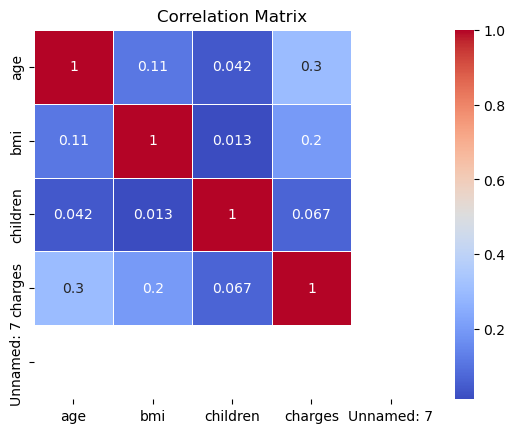

In [37]:
# Check for spaces in column names
insurance_data.columns = insurance_data.columns.str.strip()

# Check correlations between variables
correlation_matrix = insurance_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [40]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
insurance_data['sex'] = label_encoder.fit_transform(insurance_data['sex'])
insurance_data['smoker'] = label_encoder.fit_transform(insurance_data['smoker'])
insurance_data['region'] = label_encoder.fit_transform(insurance_data['region'])


In [43]:
# Features and target variable 
X = insurance_data.drop('charges', axis=1)
y = insurance_data['charges']

In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming you have X_train, X_test, y_train, and y_test before imputation

# Replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_imputed, y_train)
rf_predictions = rf_model.predict(X_test_imputed)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train_imputed, y_train)
gbr_predictions = gbr_model.predict(X_test_imputed)
gbr_mae = mean_absolute_error(y_test, gbr_predictions)
gbr_r2 = r2_score(y_test, gbr_predictions)

# K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_imputed, y_train)
knn_predictions = knn_model.predict(X_test_imputed)
knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

# Cross-validation
cv_rf = cross_val_score(rf_model, X_train_imputed, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_gbr = cross_val_score(gbr_model, X_train_imputed, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_knn = cross_val_score(knn_model, X_train_imputed, y_train, cv=5, scoring='neg_mean_absolute_error')

# Compare the performance of different algorithms
results = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'K-Nearest Neighbors'],
    'MAE': [rf_mae, gbr_mae, knn_mae],
    'R-squared': [rf_r2, gbr_r2, knn_r2],
    'CV Mean MAE': [np.mean(cv_rf), np.mean(cv_gbr), np.mean(cv_knn)],
})

print(results)


                 Model          MAE  R-squared  CV Mean MAE
0        Random Forest  2555.929427   0.883428  -2797.02438
1    Gradient Boosting  2508.418118   0.901117  -2619.35103
2  K-Nearest Neighbors  8896.220847   0.049774  -7943.21884


In [54]:
# Hyperparameter tuning using GridSearchCV for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 150],
                 'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5, 10]}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='neg_mean_absolute_error')
grid_search_rf.fit(X_train_imputed, y_train)
best_params_rf = grid_search_rf.best_params_

# Save the best model using joblib
best_rf_model = RandomForestRegressor(**best_params_rf, random_state=42)
best_rf_model.fit(X_train_imputed, y_train)
joblib.dump(best_rf_model, 'best_rf_model.joblib')

# Save the best model using pickle
with open('best_rf_model.pkl', 'wb') as model_file:
    pickle.dump(best_rf_model, model_file)


In [55]:
# Results for Random Forest Model
print("Random Forest Model:")
print("MAE:", rf_mae)
print("R-squared:", rf_r2)

# Results for Gradient Boosting Model
print("\nGradient Boosting Model:")
print("MAE:", gbr_mae)
print("R-squared:", gbr_r2)

# Results for K-Nearest Neighbors Model
print("\nK-Nearest Neighbors Model:")
print("MAE:", knn_mae)
print("R-squared:", knn_r2)

# Cross-Validation Mean MAE for Each Model
print("\nCross-Validation Mean MAE:")
print("Random Forest:", np.mean(cv_rf))
print("Gradient Boosting:", np.mean(cv_gbr))
print("K-Nearest Neighbors:", np.mean(cv_knn))

# Best Hyperparameters for Random Forest Model
print("\nBest Hyperparameters for Random Forest Model:")
print(best_params_rf)

# Print a message indicating that the best model has been saved
print("\nBest Random Forest Model saved using joblib and pickle.")


Random Forest Model:
MAE: 2555.9294270283576
R-squared: 0.8834278119122363

Gradient Boosting Model:
MAE: 2508.41811836199
R-squared: 0.901117499430293

K-Nearest Neighbors Model:
MAE: 8896.220846727612
R-squared: 0.04977435442244904

Cross-Validation Mean MAE:
Random Forest: -2797.0243802654377
Gradient Boosting: -2619.351030429729
K-Nearest Neighbors: -7943.21884017435

Best Hyperparameters for Random Forest Model:
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 150}

Best Random Forest Model saved using joblib and pickle.


In summary:

1. **Random Forest Model:**
   - Mean Absolute Error (MAE): 2555.93
   - R-squared: 0.8834
   - The model explains about 88.34% of the variance, and predictions are off by approximately $2555.93 on average.

2. **Gradient Boosting Model:**
   - Mean Absolute Error (MAE): 2508.42
   - R-squared: 0.9011
   - Slightly better performance compared to Random Forest, explaining about 90.11% of the variance.

3. **K-Nearest Neighbors Model:**
   - Mean Absolute Error (MAE): 8896.22
   - R-squared: 0.0498
   - Significantly poorer performance compared to ensemble models, explaining only a small portion (4.98%) of the variance.

4. **Cross-Validation Mean MAE:**
   - Random Forest: -2797.02
   - Gradient Boosting: -2619.35
   - K-Nearest Neighbors: -7943.22
   - Cross-validation supports the better performance of the ensemble models.

5. **Best Hyperparameters for Random Forest Model:**
   - {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 150}

6. **Overall:**
   - The Gradient Boosting model performs slightly better than the Random Forest model.
   - K-Nearest Neighbors performs significantly worse than ensemble models.
   - The best Random Forest model has been saved for future use.

I will be choosing the Gradient Boosting model for predictions due to its lower MAE and higher R-squared. 